# Homework Assignment 2
## Projecting Atmospheric Carbon Dioxide concentrations
### Samira Khan 

### Part 1: Loading and Plotting the Data

A. (10 pts) Read in the data in co2_data.txt. Remember the first row is a header with column labels.
Store the incoming data as an array and then reference the data columns you will actually use when
making your plot. You’ll want to use the third data column for the time and the fourth data column
for the CO2 concentration. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
content = np.loadtxt("co2_data.txt",skiprows=1)
# had to remove the first row is a header with column labels. 
#print(content)
time = content[:,2]#getting third data column for the time
concentration = content[:,3]#getting the fourth data column for the CO2 concentration

B. (10 pts) Plot the data for CO2 concentration vs time, including axis labels, with units, and a title.

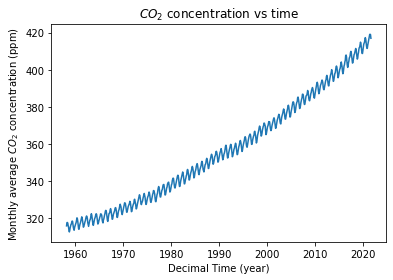

In [2]:
plt.plot(time,concentration)
plt.xlabel("Decimal Time (year)")# label for the x axis
plt.ylabel("Monthly average $CO_2$ concentration (ppm) ")# label for the y axis
plt.title("$CO_2$ concentration vs time")
plt.show()

C. (5 pts) By the way, you may notice that the data have a pronounced oscillation of about 1 year due to
seasonal variations in CO2 levels. This is superimposed on a clearly visible trend in the data. Plot
this over a two year period and estimate the magnitude. What is the source of this oscillation? (You
may have to do a little research for this.) Answer in a markdown cell

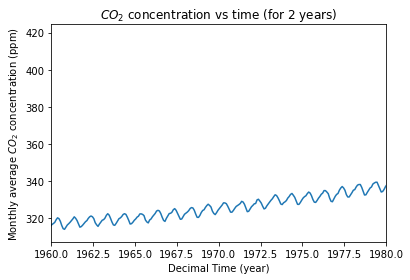

In [3]:
plt.plot(time,concentration)
plt.xlabel("Decimal Time (year)")# label for the x axis
plt.ylabel("Monthly average $CO_2$ concentration (ppm) ")# label for the y axis
plt.title("$CO_2$ concentration vs time (for 2 years)")
plt.xlim(1960,1980)
plt.show()

The Keeling curve is the name given to this curve. It depicts the continuous change in carbon dioxide concentration in the Earth's atmosphere. The levels of $CO_2$ in the atmosphere have risen dramatically in recent decades and continue to grow at an alarming rate. On the other hand, we can see that the curve has a pattern to it. Keeling first assumed that this was due to photosynthesis, as plants take in $CO_2$ during the day to photosynthesize but emit $CO_2$ at night. However, as the years passed, a greater seasonal pattern emerged. The highest levels of $CO_2$ are found in the spring, as decomposing plants release $CO_2$ into the air, and the lowest levels are seen in the autumn, as plants stop taking in $CO_2$.

Reference:
www.nationalgeographic.org/encyclopedia/keeling-curve/

D. (10 points) Smooth out the annual variation by making yearly averages of the data. To make things
simple, ignore the years that do not have 12 months of data (1958 and 2021). For the remaining
years, calculate the average over twelve months. This should give you a data set with annual average
CO2 levels. Plot this on top of the original data. Does this make the trend in the data clearer?

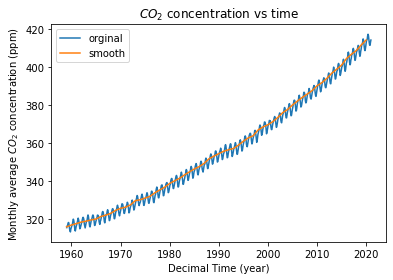

In [4]:
year = content[:,0] #getting the first data column for the year
total = len(year)# to find the total rows
content1=content[10:total-7,:] # got the subarray 
#print(content1)
#which does not have the 1958 and 2021 data 
#print(content1)
year1 =content1[:,0] 
#print(year1)
#getting the first data column for the year from the subarray
c =0 #this will add all the concentration for a specific year
count= 0 # this is just a counter
avgC=[] # this is a list where all the average of each year will be added
for x in range(1,len(year1)):
    a = year1[x] 
    #print(a)
    b = year1[x-1]
    #print(b)
    if a ==b:# comparing the values
        count += 1
        #print(count)
        c += content1[x,3]#adding the concentraion 
        #print(content1[x,3])
        if count==11:#checking if 12 months have reached
            #print(c)
            #print(count)
            avg = c/11 # it will do the average calculation
            #print(avg)
            avgC.append(avg)
            count=0 #start the counter and c all over again for a new year
            c = 0
avgC=np.array(list(avgC))# making it into a array 
#print(avgC)
step = np.arange(1959,2021)
time1 = content1[:,2]
concentration1= content1[:,3]
#print(concentration1)
plt.plot(time1,concentration1,label ="orginal")
plt.plot(step,avgC,label ="smooth")
plt.legend()
plt.xlabel("Decimal Time (year)")# label for the x axis
plt.ylabel("Monthly average $CO_2$ concentration (ppm) ")# label for the y axis
plt.title("$CO_2$ concentration vs time")
plt.show()

### Part 2. Linear and Quadratic fits

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
content = np.loadtxt("co2_data.txt",skiprows=1)
time = content[:,2]
timearray=[]
timearray.append(0)
for x in range(1,len(time)):
    a = time[x]
    b = time[0]
    sub = a-b
    timearray.append(sub)
timearray=np.array(list(timearray))
concentration = content[:,3]
print(timearray)

[ 0.      0.085   0.1672  0.2521  0.3343  0.4192  0.5041  0.5863  0.6713
  0.7535  0.8384  0.9233  1.      1.085   1.1672  1.2521  1.3343  1.4192
  1.5041  1.5863  1.6713  1.7535  1.8383  1.923   2.0022  2.0869  2.1689
  2.2536  2.3356  2.4203  2.505   2.5869  2.6716  2.7536  2.8384  2.9233
  3.      3.085   3.1672  3.2521  3.3343  3.4192  3.5041  3.5863  3.6713
  3.7535  3.8384  3.9233  4.      4.085   4.1672  4.2521  4.3343  4.4192
  4.5041  4.5863  4.6713  4.7535  4.8384  4.9233  5.      5.085   5.1672
  5.2521  5.3343  5.4192  5.5041  5.5863  5.6713  5.7535  5.8383  5.923
  6.0022  6.0869  6.1689  6.2536  6.3356  6.4203  6.505   6.5869  6.6716
  6.7536  6.8384  6.9233  7.      7.085   7.1672  7.2521  7.3343  7.4192
  7.5041  7.5863  7.6713  7.7535  7.8384  7.9233  8.      8.085   8.1672
  8.2521  8.3343  8.4192  8.5041  8.5863  8.6713  8.7535  8.8384  8.9233
  9.      9.085   9.1672  9.2521  9.3343  9.4192  9.5041  9.5863  9.6713
  9.7535  9.8383  9.923  10.0022 10.0869 10.1689 10.

A. (10 pts) Perform a linear fit to the data, and find the best values of the intercept and slope. To do
this, first define a linear function.

a. Plot the data and the best fit line together.

b. Print the best fit parameter values +/- σ (uncertainties) to the screen (include units)

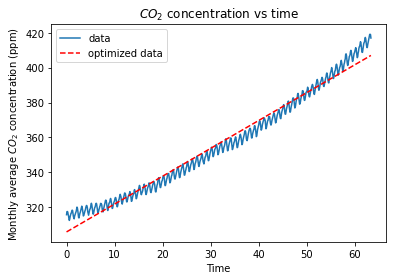

In [6]:
from scipy.optimize import curve_fit
#plt.plot(timearray,concentration)
def test(timearray, a, b):#made a liner funtion 
    return a*timearray + b
param, pcov = curve_fit(test, timearray,concentration)
ans = (param[0]*timearray+param[1])
plt.plot(timearray,concentration, label ="data")
plt.plot(timearray, ans, '--', color ='red', label ="optimized data")
plt.xlabel("Time")# label for the x axis
plt.ylabel("Monthly average $CO_2$ concentration (ppm) ")# label for the y axis
plt.title("$CO_2$ concentration vs time")
plt.legend()
plt.show()

In [7]:
print("a =", param[0], "+/-", pcov[0,0]**0.5,"(ppm/year)")
print("b =", param[1], "+/-", pcov[1,1]**0.5, "(ppm)")

a = 1.5970324881775113 +/- 0.00898001136363222 (ppm/year)
b = 305.8287342878468 +/- 0.3285092966614499 (ppm)


B. (5 pts) Make a separate plot of the residuals (the difference between the fit and the data). What
information do we get from residuals? Assess your fit: how well do you think the data is fit by a
straight line? Be sure to justify your assessment with reference to the plot. Your answer to this
part should be included as a Jupyter markdown cell.

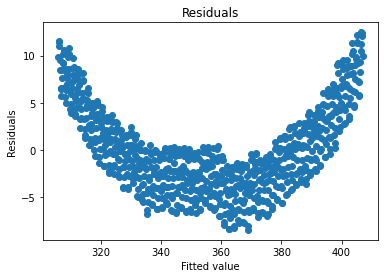

In [8]:
residuals = concentration - test(timearray, *param)
plt.scatter(ans,residuals)
plt.xlabel("Fitted value")# label for the x axis
plt.ylabel("Residuals")# label for the y axis
plt.title("Residuals")
plt.show()

The residual plot is not that scattred but it shows a curve. All the datas are not close to the line 0. That's why we can say it's not a great fit.

C. (10 pts) Next, you will investigate whether you can find a better fit to the data. Define a
quadratic fit function and use it to fit to the data, and extract the best values of the fit parameters.

a. Plot the data and the best fit line together.

b. Print the best fit parameter values +/- σ (uncertainties) to the screen (include units).

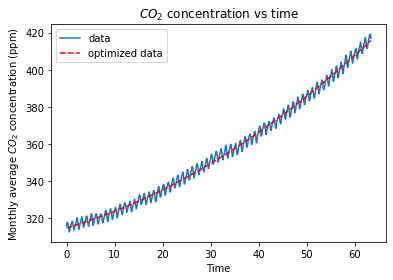

In [51]:
from scipy.optimize import curve_fit
#plt.plot(timearray,concentration)
step=(0)
def test1(timearray, a, b,c):#a quadratic function
    return a*(timearray**2) + b*timearray + c
param1, pcov1 = curve_fit(test1, timearray,concentration)
ans1 = (param1[0]*(timearray**2)+param1[1]*timearray+param1[2])
plt.plot(timearray,concentration, label ="data")
plt.plot(timearray, ans1, '--', color ='red', label ="optimized data")
plt.xlabel("Time")# label for the x axis
plt.ylabel("Monthly average $CO_2$ concentration (ppm) ")# label for the y axis
plt.title("$CO_2$ concentration vs time")
plt.legend()
plt.show()

In [10]:
print("a =", param1[0], "+/-", pcov1[0,0]**0.5)
print("b =", param1[1], "+/-", pcov1[1,1]**0.5)
print("c =", param1[2], "+/-", pcov1[2,2]**0.5, "(ppm)")

a = 0.01315140120129953 +/- 0.00027010990460923896
b = 0.763998393510611 +/- 0.017671731985649662
c = 314.61226499803905 +/- 0.24233273406021136 (ppm)


D. (5 pts) Once again, make a separate plot of the residuals. Assess your fit: how well do you think
the data is fit by a quadratic function? Does this work as well as, better, or worse than the linear
fit? Discuss. Once again, write your answer in a markdown cell.

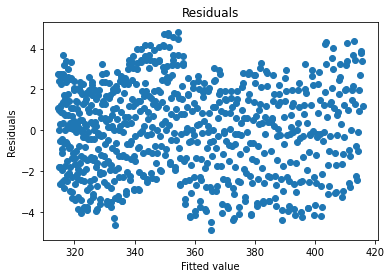

In [11]:
residuals1 = concentration - test1(timearray, *param1)
plt.scatter(ans1,residuals1)
plt.xlabel("Fitted value")# label for the x axis
plt.ylabel("Residuals")# label for the y axis
plt.title("Residuals")
plt.show()

The residual plot is not that scattred but it shows that it is pretty close to the line 0. We can say this is a better fit than the liner fit.

E. (15 points) On a single graph, plot and compare (i) the residuals from the linear fit and (ii) the
residuals from the quadratic fit. Calculate the chi-squared and the reduced chi-squared for each
fit. What does this tell you about the quality of the two fits? Discuss in a markdown cell.

Text(0.5, 1.0, 'Residuals')

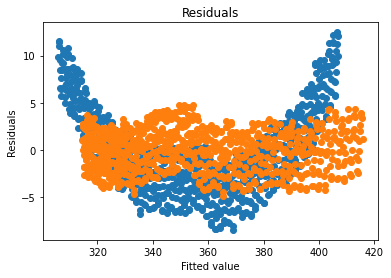

In [12]:
plt.scatter(ans,residuals)
plt.scatter(ans1,residuals1)
plt.xlabel("Fitted value")# label for the x axis
plt.ylabel("Residuals")# label for the y axis
plt.title("Residuals")

Here it's pretty visible that the quadratic fit is much better than the liner fit. After calculating the chi-squared and the reduced chi-squared  we will get to take a final choice.

In [13]:
from scipy.stats import chisquare
print("Linear fit ")
chisq, p = chisquare(concentration,ans)
print("chi-squared: ", chisq)
alpha =0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
size = len(concentration)
reducedChisq = chisq/size-1
print("Reduced chi-squared:",reducedChisq)

Linear fit 
chi-squared:  43.974919701849444
p value is 1.0
Independent (H0 holds true)
Reduced chi-squared: -0.9422142973694488


In [14]:
from scipy.stats import chisquare
print("Quadratic fit")
chisq1, p = chisquare(concentration,ans1)
print("chi-squared: ", chisq1)
alpha =0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
reducedChisq1 = chisq1/size-1
print("Reduced chi-squared:",reducedChisq1)

Quadratic fit
chi-squared:  10.599591896415056
p value is 1.0
Independent (H0 holds true)
Reduced chi-squared: -0.9860714955369053


That the quality of the quadratic fit is better than the linear fit because the chi-squared is less than the linear fit.

F. (5 pts) Compare the plot with the better of the two (linear/quadratic) fits to the plot of the
running average of the data from Part 1D. Discuss the difference, if any, between the two

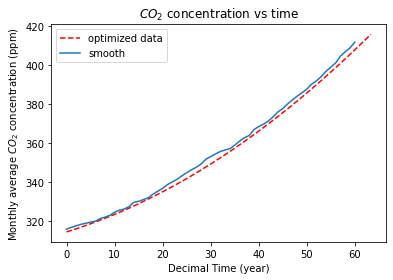

In [18]:
year = content[:,0]
total = len(year)
content1=content[10:total-7,:]
#print(content1)
year1 =content1[:,0]
c =0 
count= 0 
avgC=[]
for x in range(0,len(year1)):
    #print (x)
    if x>0:
        a = year1[x]
        #print(a)
        b = year1[x-1]
        #print(b)
        if a ==b:
            count += 1
            #print(count)
            c += content1[x,3]
        else:
            if count==11:
                #print(c)
                #print(count)
                avg = c/11
                avgC.append(avg)
                count=0
                c = 0
avgC=np.array(list(avgC))
#print(avgC)
time1 = content1[:,2]
concentration1= content1[:,3]
plt.plot(timearray, ans1, '--', color ='red', label ="optimized data")
plt.plot(avgC,label ="smooth")
plt.legend()
plt.xlabel("Decimal Time (year)")# label for the x axis
plt.ylabel("Monthly average $CO_2$ concentration (ppm) ")# label for the y axis
plt.title("$CO_2$ concentration vs time")
plt.show()

It looks exactly the same!

Part 3. Projecting future CO2 levels
Use your linear and quadratic fits to project the CO2 levels at Mauna Loa in 2058, 100 years since the
beginning of the data set.


A. (15 pts) Generate a plot with the data and your two fits (one linear, one quadratic) with the time
axis extended to 100 years, and find the value of the CO2 concentration at t=100 years in your
linear fit and your quadratic fit, and print these to the screen, with units

(0.0, 100.0)

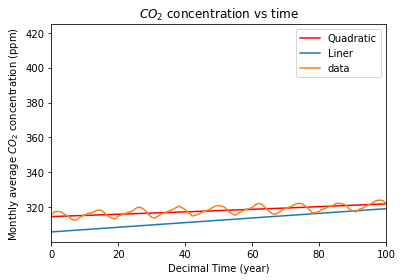

In [49]:
step=np.linspace(0,100,1200)
def test(timearray, a, b):#made a liner funtion 
    return a*timearray + b
param, pcov = curve_fit(test, timearray,concentration)
ans = (param[0]*timearray+param[1])
def test1(timearray, a, b,c):#a quadratic function
    return a*(timearray**2) + b*timearray + c
param1, pcov1 = curve_fit(test1, timearray,concentration)
ans1 = (param1[0]*(timearray**2)+param1[1]*timearray+param1[2])


plt.plot(ans1, color ='red', label ="Quadratic")
plt.plot(ans, label ="Liner")
plt.plot(concentration, label ="data")
plt.legend()
plt.xlabel("Decimal Time (year)")# label for the x axis
plt.ylabel("Monthly average $CO_2$ concentration (ppm) ")# label for the y axis
plt.title("$CO_2$ concentration vs time")
plt.xlim(0,100)

In [50]:
t =100
ans1 = (param1[0]*(t**2)+param1[1]*t+param1[2])
ans = (param[0]*t+param[1])
print("The CO2 concentration at t=100 years in your linear fit:",ans,"ppm")
print("The CO2 concentration at t=100 years in your quadratic fit:", ans1,"ppm")

The CO2 concentration at t=100 years in your linear fit: 465.531983105598 ppm
The CO2 concentration at t=100 years in your quadratic fit: 522.5261163620954 ppm
